Please find below the Project 2 for Supervised Learning course. This is an individual assignment. Kindly submit it before it's deadline.

Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Dataset:Bank_Personal_Loan_Modelling-1.csvView in a new window

Column description: TheraBank_Column_Description.xlsxView in a new window

Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

Please name your file in the following format - CourseName_ResidencyNumber_ProjectNo_Title.ipynb

For Ex - Supervised Learning_R4_Project2_Thera Bank.ipynb

## 1) Read the column description and ensure you understand each attribute well

In [273]:
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

perloan_1=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
perdatades=pd.read_excel("TheraBank_Column_Description.xlsx",usecols="B:C",skiprows=7,header=0)

In [274]:
pd.set_option('display.max_colwidth', -1)
perdatades

,ID,Customer ID
0,Age,Customer's age in completed years
1,Experience,#years of professional experience
2,Income,Annual income of the customer ($000)
3,ZIPCode,Home Address ZIP code.
4,Family,Family size of the customer
5,CCAvg,Avg. spending on credit cards per month ($000)
6,Education,Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
7,Mortgage,Value of house mortgage if any. ($000)
8,Personal Loan,Did this customer accept the personal loan offered in the last campaign?
9,Securities Account,Does the customer have a securities account with the bank?


In [275]:
perloan=perloan_1.copy()

In [276]:
perloan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [277]:
perloan_cat=perloan[['Education','Family','Personal Loan','Securities Account','CD Account','Online','CreditCard','Experience','ZIP Code']]
perloan_num=perloan[['Age','Income','CCAvg','Mortgage',]]

In [278]:
perloan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [279]:
perloan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [280]:
perloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [281]:
perloan.shape

(5000, 14)

In [282]:
perloan.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### 2) Study the data distribution in each attribute, share your findings.

In [283]:
# Checking the data distribution for categorical variables
for columns in perloan_cat.columns:
    print('\n',columns,':\n',perloan[columns].value_counts())    


 Education :
 1    2096
3    1501
2    1403
Name: Education, dtype: int64

 Family :
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

 Personal Loan :
 0    4520
1    480 
Name: Personal Loan, dtype: int64

 Securities Account :
 0    4478
1    522 
Name: Securities Account, dtype: int64

 CD Account :
 0    4698
1    302 
Name: CD Account, dtype: int64

 Online :
 1    2984
0    2016
Name: Online, dtype: int64

 CreditCard :
 0    3530
1    1470
Name: CreditCard, dtype: int64

 Experience :
  32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38    88 
 39    85 
 2     85 
 1     74 
 0     66 
 40    57 
 41    43 
-1     33 
-2     1

#### Form the dataset and business requirement, we can conclude that "Personal Loan" variable as target variable, that is to know the target customer for the next campaign.

<function matplotlib.pyplot.show(*args, **kw)>

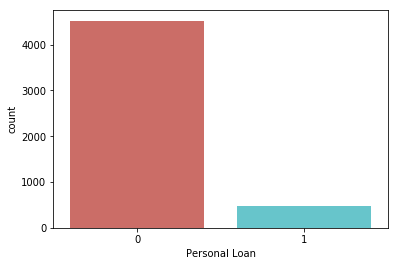

In [284]:
# ploting the data distribution for the target columns "Personal Loan", 1 as responders and 0 as non-responders
import seaborn as sns
import matplotlib.pyplot as plt
perloan['Personal Loan'].value_counts()
sns.countplot(x='Personal Loan',data=perloan,palette='hls')
plt.show

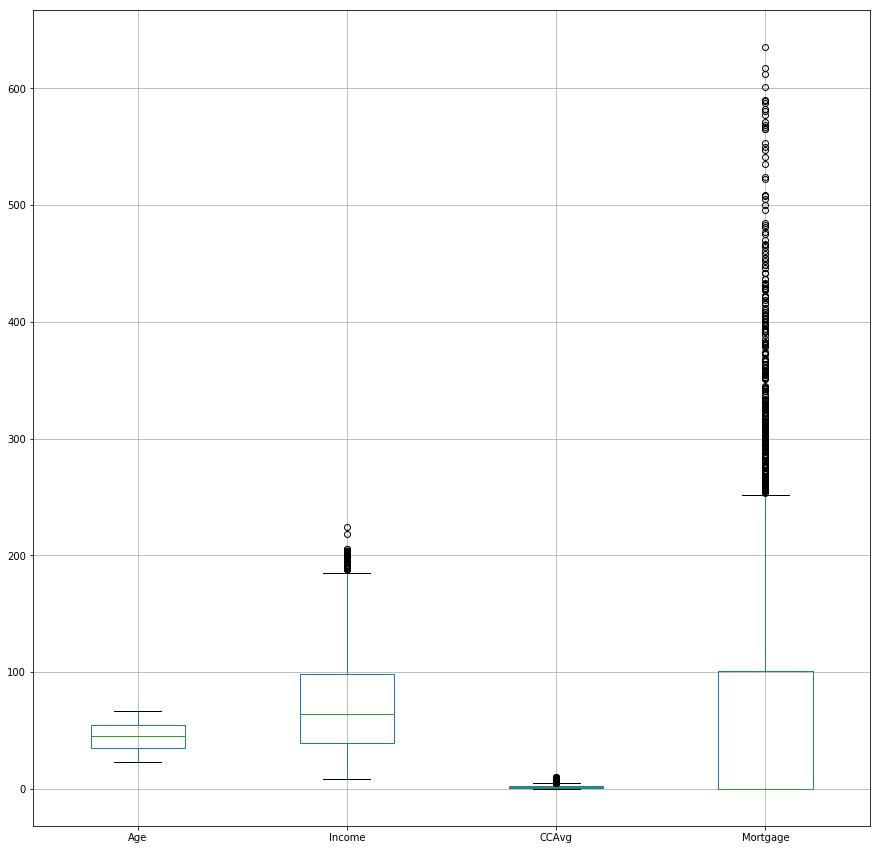

In [285]:
# Checking the outliers for numerical columns
perloan_num.plot.box(grid='True',figsize=(15,15))

#### Based on the boxplot, we can observe that there are ouliers present in Mortgage, CCavg and income variables, thus we can treat the outliers based on the response rate for the outliers to know the impotance of the ourliers datas \n
##### Checking for the response rate for the Mortgage, CCavg and income variables


In [286]:
Q1=perloan_num.quantile(0.25)
Q3=perloan_num.quantile(0.75)
IQR = Q3-Q1
Lower_cap = Q1 - 1.5*IQR
Higher_cap = Q3 + 1.5*IQR
print('Lower_capping\n',Lower_cap)
print('\nUpper_capping\n',Higher_cap)

Lower_capping
 Age         5.0  
Income     -49.5 
CCAvg      -2.0  
Mortgage   -151.5
dtype: float64

Upper_capping
 Age         85.0 
Income      186.5
CCAvg       5.2  
Mortgage    252.5
dtype: float64


In [287]:
# Response rate for the Mortgage
perloan['decile'] = pd.qcut(perloan['Mortgage'], 10, labels=False,duplicates='drop')

Rrate_Mort =  perloan.fillna(-1).groupby('decile').apply(lambda x: pd.Series([
        np.min(x['Mortgage']),
        np.max(x['Mortgage']),
        np.mean(x['Mortgage']),
        np.size(x['Mortgage']),
        np.sum(x['Personal Loan']),
        np.size(x['Personal Loan'][x['Personal Loan']==0]),
        ],
        index=(["min_Mort","max_Mort","avg_Mort",
        "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()

Rrate_Mort["rrate"]=Rrate_Mort["cnt_resp"]*100/Rrate_Mort["cnt"]
Rrate_Mort

,decile,min_Mort,max_Mort,avg_Mort,cnt,cnt_resp,cnt_non_resp,rrate
0,0,0.0,78.0,0.854042,3501.0,314.0,3187.0,8.968866
1,1,79.0,123.0,101.005917,507.0,23.0,484.0,4.536489
2,2,124.0,200.0,158.131579,494.0,27.0,467.0,5.465587
3,3,201.0,635.0,301.560241,498.0,116.0,382.0,23.293173


In [288]:
# Response rate for the CCavg
perloan['decile_CCavg'] = pd.qcut(perloan['CCAvg'], 7, labels=False)

Rrate_CCavg =  perloan.fillna(-1).groupby('decile_CCavg').apply(lambda x: pd.Series([
        np.min(x['CCAvg']),
        np.max(x['CCAvg']),
        np.mean(x['CCAvg']),
        np.size(x['CCAvg']),
        np.sum(x['Personal Loan']),
        np.size(x['Personal Loan'][x['Personal Loan']==0]),
        ],
        index=(["min_CCavg","max_CCavg","avg_CCavg",
        "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()

Rrate_CCavg["rrate"]=Rrate_CCavg["cnt_resp"]*100/Rrate_CCavg["cnt"]
Rrate_CCavg

,decile_CCavg,min_CCavg,max_CCavg,avg_CCavg,cnt,cnt_resp,cnt_non_resp,rrate
0,0,0.00,0.3,0.179019,734.0,17.0,717.0,2.316076
1,1,0.40,0.8,0.605706,843.0,27.0,816.0,3.202847
2,2,0.90,1.3,1.080325,615.0,25.0,590.0,4.065041
3,3,1.33,1.8,1.601813,761.0,19.0,742.0,2.496715
4,4,1.90,2.4,2.123613,692.0,28.0,664.0,4.046243
5,5,2.50,3.5,2.843374,649.0,99.0,550.0,15.254237
6,6,3.60,10.0,5.452422,706.0,265.0,441.0,37.535411


In [289]:
# Response rate for the CCavg
perloan['decile_Income'] = pd.qcut(perloan['Income'], 40, labels=False)

Rrate_Income =  perloan.fillna(-1).groupby('decile_Income').apply(lambda x: pd.Series([
        np.min(x['Income']),
        np.max(x['Income']),
        np.mean(x['Income']),
        np.size(x['Income']),
        np.sum(x['Personal Loan']),
        np.size(x['Personal Loan'][x['Personal Loan']==0]),
        ],
        index=(["min_CCavg","max_CCavg","avg_CCavg",
        "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()

Rrate_Income["rrate"]=Rrate_Income["cnt_resp"]*100/Rrate_Income["cnt"]
Rrate_Income

,decile_Income,min_CCavg,max_CCavg,avg_CCavg,cnt,cnt_resp,cnt_non_resp,rrate
0,0,8.0,12.0,10.116279,129.0,0.0,129.0,0.000000
1,1,13.0,18.0,15.429530,149.0,0.0,149.0,0.000000
2,2,19.0,20.0,19.474747,99.0,0.0,99.0,0.000000
3,3,21.0,22.0,21.500000,130.0,0.0,130.0,0.000000
4,4,23.0,25.0,24.060606,165.0,0.0,165.0,0.000000
5,5,28.0,29.0,28.515385,130.0,0.0,130.0,0.000000
6,6,30.0,31.0,30.466102,118.0,0.0,118.0,0.000000
7,7,32.0,33.0,32.467890,109.0,0.0,109.0,0.000000
8,8,34.0,35.0,34.550847,118.0,0.0,118.0,0.000000
9,9,38.0,39.0,38.490909,165.0,0.0,165.0,0.000000


#### From the response rate, we can observe that there are higher response rate exists from the outliers, thus i have replacing the outliers values to higher Capped values for the CCAvg, Income and Mortgage varailable

In [291]:
perloan_fin=perloan.drop(columns=['ID','ZIP Code'])

In [292]:
High_cap_Mort=perloan_num['Mortgage'].quantile(0.75) + 1.5*(perloan_num['Mortgage'].quantile(0.75)-perloan_num['Mortgage'].quantile(0.25))
High_cap_Income=perloan_num['Income'].quantile(0.75) + 1.5*(perloan_num['Income'].quantile(0.75)-perloan_num['Income'].quantile(0.25))
High_cap_CCAvg=perloan_num['CCAvg'].quantile(0.75) + 1.5*(perloan_num['CCAvg'].quantile(0.75)-perloan_num['CCAvg'].quantile(0.25))

In [293]:
perloan_fin['Experience']=perloan_fin['Experience'].map(lambda x:0 if x<0 else x)
perloan_fin['CCAvg']=perloan_fin['CCAvg'].map(lambda x: High_cap_CCAvg if x>High_cap_CCAvg else x)
perloan_fin['Income']=perloan_fin['Income'].map(lambda x:High_cap_Income if x>High_cap_Income else x)
perloan_fin['Mortgage']=perloan_fin['Mortgage'].map(lambda x:High_cap_Mort if x>High_cap_Mort else x)

In [294]:
print('Higher Cap for Mortgage:',High_cap_Mort,'\nHigher Cap for income:',High_cap_Income,'\nHigher Cap for CCAvg:',High_cap_CCAvg)

Higher Cap for Mortgage: 252.5 
Higher Cap for income: 186.5 
Higher Cap for CCAvg: 5.2


In [295]:
perloan_fin.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.617400,45.626122,8.0,39.0,64.0,98.0,186.5
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.831338,1.452215,0.0,0.7,1.5,2.5,5.2
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,50.494700,83.005401,0.0,0.0,0.0,101.0,252.5
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


### 3) Get the target column distribution. Your comments

In [290]:
print('Based on the summary stat, I am considering below:\n1)Column "Personal Loan" as target columns,\n2)Removing ID column \n3)Experience has few negative values, which is not correct as no one will have negative experience, thus replacing negative with "0"')
print('4)From the Zip code column, we can observe that there are 1 to 2 members listed from perticular place/zip code, which might induce bias in the model, thus I am dropping the Zip Code columns')

Based on the summary stat, I am considering below:
1)Column "Personal Loan" as target columns,
2)Removing ID column 
3)Experience has few negative values, which is not correct as no one will have negative experience, thus replacing negative with "0"
4)From the Zip code column, we can observe that there are 1 to 2 members listed from perticular place/zip code, which might induce bias in the model, thus I am dropping the Zip Code columns


<function matplotlib.pyplot.show(*args, **kw)>

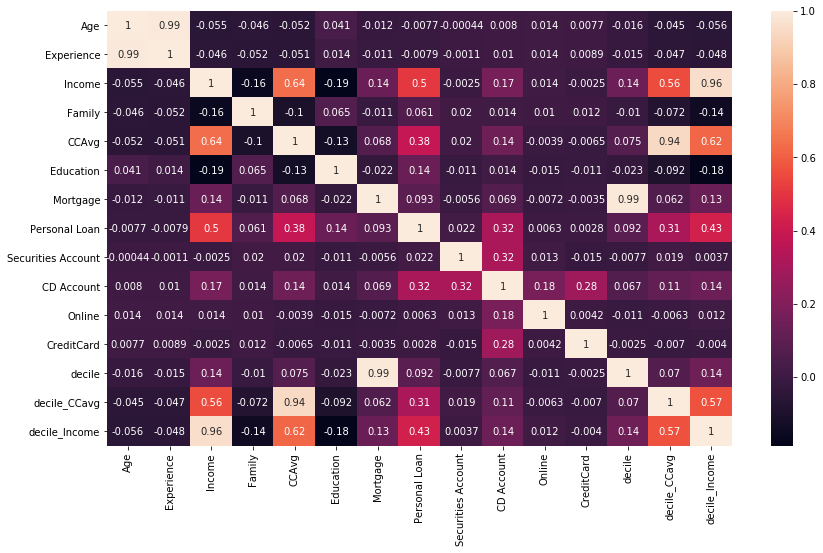

In [299]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.heatmap(perloan_fin.corr(), annot=True)
plt.show

### 4) Split the data into training and test set in the ratio of 70:30 respectively

In [300]:
x=perloan_fin.drop(columns=['Personal Loan'])
y=perloan_fin['Personal Loan']

In [306]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=50)

### 5.Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

### A) BernoulliNB

In [340]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [307]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [328]:
from sklearn.metrics import classification_report

pre_dat_NB=pd.DataFrame(classification_report(y_test,y_pred_test,output_dict=True)).T
pre_dat_NB

,f1-score,precision,recall,support
0,0.946619,0.915978,0.979381,1358.0
1,0.210526,0.416667,0.140845,142.0
micro avg,0.900000,0.900000,0.900000,1500.0
macro avg,0.578573,0.666322,0.560113,1500.0
weighted avg,0.876936,0.868710,0.900000,1500.0


### B) KNeighborsClassifier Method

In [316]:
from sklearn.neighbors import KNeighborsClassifier
NearMethod=KNeighborsClassifier(n_neighbors = 14, weights = 'uniform', metric = 'euclidean')
NearMethod.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

In [327]:
from sklearn.metrics import classification_report
pre_dat_near=pd.DataFrame(classification_report(y_test,y_pred_test_near,output_dict=True)).T
pre_dat_near

,f1-score,precision,recall,support
0,0.950820,0.921271,0.982327,1358.0
1,0.288660,0.538462,0.197183,142.0
micro avg,0.908000,0.908000,0.908000,1500.0
macro avg,0.619740,0.729866,0.589755,1500.0
weighted avg,0.888135,0.885031,0.908000,1500.0


### C) Logistic Regression

In [321]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [322]:
y_pred_test_reg=logmodel.predict(x_test)
y_pred_train_reg=logmodel.predict(x_train)

In [324]:
logmodel.coef_

array([[-0.649445  ,  0.65023325, -0.00608968,  0.57669806, -0.04531487,
         1.85047423,  0.00581518, -0.86389617,  3.46065782, -0.53369371,
        -1.1899184 , -0.38192643,  0.30648621,  0.41398463]])

In [326]:
from sklearn.metrics import classification_report

pre_dat_reg=pd.DataFrame(classification_report(y_test,y_pred_test_reg,output_dict=True)).T
pre_dat_reg

,f1-score,precision,recall,support
0,0.973951,0.957326,0.991163,1358.0
1,0.694915,0.872340,0.577465,142.0
micro avg,0.952000,0.952000,0.952000,1500.0
macro avg,0.834433,0.914833,0.784314,1500.0
weighted avg,0.947535,0.949280,0.952000,1500.0


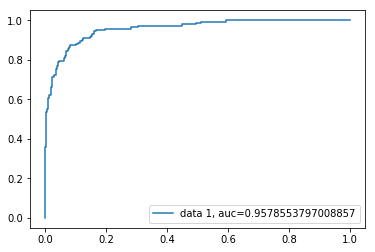

In [330]:
from sklearn import metrics
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 6) Print the confusion matrix for all the above models

Text(0.5, 1.05, 'Confusion matrix for test dataset by BernoulliNB Model')

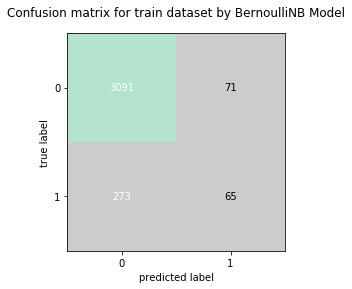

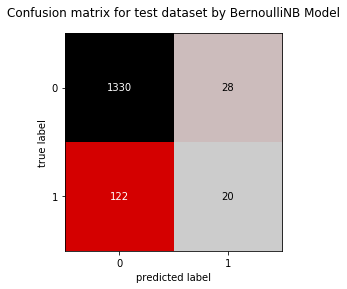

In [370]:
y_pred_test_NB=NB.predict(x_test)
y_pred_train_NB=NB.predict(x_train)

perloan_train=confusion_matrix(y_train,y_pred_train)
plot_confusion_matrix(conf_mat=perloan_train,cmap='Pastel2_r')
plt.title('Confusion matrix for train dataset by BernoulliNB Model')

perloan_test=confusion_matrix(y_test,y_pred_test)
plot_confusion_matrix(conf_mat=perloan_test,cmap='nipy_spectral_r')
plt.title('Confusion matrix for test dataset by BernoulliNB Model')

Text(0.5, 1.05, 'Confusion matrix for test dataset by KNN Model')

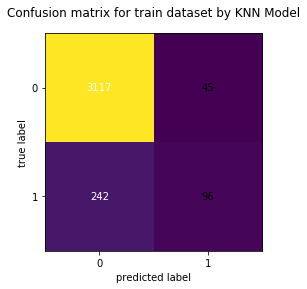

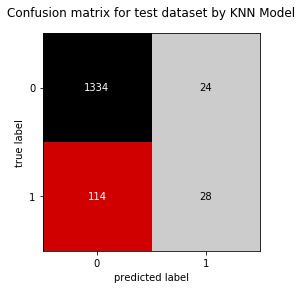

In [359]:
y_pred_train_near=NearMethod.predict(x_train)
y_pred_test_near=NearMethod.predict(x_test)

perloan_train_near=confusion_matrix(y_train,y_pred_train_near)
plot_confusion_matrix(conf_mat=perloan_train_near,cmap='viridis')
plt.title('Confusion matrix for train dataset by KNN Model')

perloan_test_near=confusion_matrix(y_test,y_pred_test_near)
plot_confusion_matrix(conf_mat=perloan_test_near,cmap='nipy_spectral_r')
plt.title('Confusion matrix for test dataset by KNN Model')

<function matplotlib.pyplot.show(*args, **kw)>

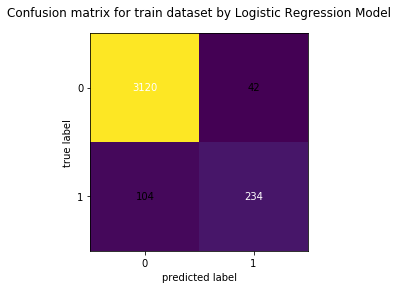

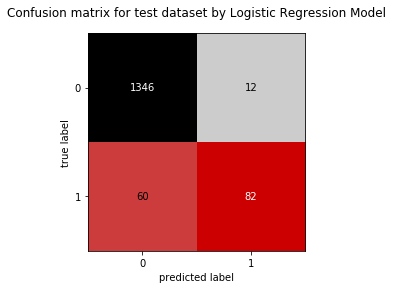

In [371]:
perloan_train_reg=confusion_matrix(y_train,y_pred_train_reg)
fig, ax = plot_confusion_matrix(conf_mat=perloan_train_reg,cmap='viridis')
plt.title('Confusion matrix for train dataset by Logistic Regression Model')
plt.show
perloan_test_reg=confusion_matrix(y_test,y_pred_test_reg)
fig, ax = plot_confusion_matrix(conf_mat=perloan_test_reg,cmap='nipy_spectral_r')
plt.title('Confusion matrix for test dataset by Logistic Regression Model')
plt.show

### 7) Give your reasoning on which is the best model in this case and why it performs better

In [331]:
## Comparing results for 3 models

In [385]:
print('Classification_report for NB on Test dataset:\n',pre_dat_NB)
print('\nClassification_report for KNN on Test dataset:\n',pre_dat_near)
print('\nClassification_report for Logistic Regression on Test dataset:\n',pre_dat_reg)

Classification_report for NB on Test dataset:
               f1-score  precision    recall  support
0             0.946619  0.915978   0.979381  1358.0 
1             0.210526  0.416667   0.140845  142.0  
micro avg     0.900000  0.900000   0.900000  1500.0 
macro avg     0.578573  0.666322   0.560113  1500.0 
weighted avg  0.876936  0.868710   0.900000  1500.0 

Classification_report for KNN on Test dataset:
               f1-score  precision    recall  support
0             0.950820  0.921271   0.982327  1358.0 
1             0.288660  0.538462   0.197183  142.0  
micro avg     0.908000  0.908000   0.908000  1500.0 
macro avg     0.619740  0.729866   0.589755  1500.0 
weighted avg  0.888135  0.885031   0.908000  1500.0 

Classification_report for Logistic Regression on Test dataset:
               f1-score  precision    recall  support
0             0.973951  0.957326   0.991163  1358.0 
1             0.694915  0.872340   0.577465  142.0  
micro avg     0.952000  0.952000   0.952000 

In [390]:
print('From the above classificaiotn report, we can observe that the accuracy, precision, recall is' 
      'marginaly haigher for Logistic regression model when compared to other two model')
print('This could due to one of the following reason\n1) There is less bias in the dataset \n2) The dataset is simple enough for logistic to predict higher accuracy')

From the above classificaiotn report, we can observe that the accuracy, precision, recall ismarginaly haigher for Logistic regression model when compared to other two model
This could due to one of the following reason
1) There is less bias in the dataset 
2) The dataset is simple enough for logistic to predict higher accuracy
